<a href="https://colab.research.google.com/github/daivik05/signature_personality_prediction/blob/main/signature_personality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score , auc
from sklearn.model_selection import train_test_split

import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub

from keras.applications import MobileNetV2
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D

In [ ]:
!pip install tensorflow

In [ ]:
repo_name = 'signature_personality_prediction'
repo_url = f'https://github.com/daivik05/signature_personality_prediction.git'
!git clone $repo_url

Cloning into 'signature_personality_prediction'...
remote: Enumerating objects: 2303, done.
remote: Counting objects: 100% (517/517), done.
remote: Compressing objects: 100% (510/510), done.
remote: Total 2303 (delta 7), reused 514 (delta 4), pack-reused 1786
Receiving objects: 100% (2303/2303), 328.54 MiB | 18.33 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Updating files: 100% (4305/4305), done.


In [ ]:
project_dir = f'/content/{repo_name}'
%cd $project_dir

/content/signature_personality_prediction


In [ ]:
train_path = 'archive (1)/sign_data/train'

In [ ]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Binary classification
    subset='training'
)

Found 1375 images belonging to 128 classes.


In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
 train_path,
    batch_size=256,
  image_size=(224,224), shuffle=True
)

Found 1649 files belonging to 128 classes.


In [ ]:
for img, label in train_generator:
    print("Training Batch Shapes:", img.shape, label.shape)
    break

Training Batch Shapes: (32, 224, 224, 3) (32,)


In [ ]:
train_generator.class_indices

{'001': 0,
 '001_forg': 1,
 '002': 2,
 '002_forg': 3,
 '003': 4,
 '003_forg': 5,
 '004': 6,
 '004_forg': 7,
 '006': 8,
 '006_forg': 9,
 '009': 10,
 '009_forg': 11,
 '012': 12,
 '012_forg': 13,
 '013': 14,
 '013_forg': 15,
 '014': 16,
 '014_forg': 17,
 '015': 18,
 '015_forg': 19,
 '016': 20,
 '016_forg': 21,
 '017': 22,
 '017_forg': 23,
 '018': 24,
 '018_forg': 25,
 '019': 26,
 '019_forg': 27,
 '020': 28,
 '020_forg': 29,
 '021': 30,
 '021_forg': 31,
 '022': 32,
 '022_forg': 33,
 '023': 34,
 '023_forg': 35,
 '024': 36,
 '024_forg': 37,
 '025': 38,
 '025_forg': 39,
 '026': 40,
 '026_forg': 41,
 '027': 42,
 '027_forg': 43,
 '028': 44,
 '028_forg': 45,
 '029': 46,
 '029_forg': 47,
 '030': 48,
 '030_forg': 49,
 '031': 50,
 '031_forg': 51,
 '032': 52,
 '032_forg': 53,
 '033': 54,
 '033_forg': 55,
 '034': 56,
 '034_forg': 57,
 '035': 58,
 '035_forg': 59,
 '036': 60,
 '036_forg': 61,
 '037': 62,
 '037_forg': 63,
 '038': 64,
 '038_forg': 65,
 '039': 66,
 '039_forg': 67,
 '040': 68,
 '040_forg':

In [ ]:
len(train_data.class_names)

128

In [ ]:
class_labels = train_data.class_names
class_labels

['001',
 '001_forg',
 '002',
 '002_forg',
 '003',
 '003_forg',
 '004',
 '004_forg',
 '006',
 '006_forg',
 '009',
 '009_forg',
 '012',
 '012_forg',
 '013',
 '013_forg',
 '014',
 '014_forg',
 '015',
 '015_forg',
 '016',
 '016_forg',
 '017',
 '017_forg',
 '018',
 '018_forg',
 '019',
 '019_forg',
 '020',
 '020_forg',
 '021',
 '021_forg',
 '022',
 '022_forg',
 '023',
 '023_forg',
 '024',
 '024_forg',
 '025',
 '025_forg',
 '026',
 '026_forg',
 '027',
 '027_forg',
 '028',
 '028_forg',
 '029',
 '029_forg',
 '030',
 '030_forg',
 '031',
 '031_forg',
 '032',
 '032_forg',
 '033',
 '033_forg',
 '034',
 '034_forg',
 '035',
 '035_forg',
 '036',
 '036_forg',
 '037',
 '037_forg',
 '038',
 '038_forg',
 '039',
 '039_forg',
 '040',
 '040_forg',
 '041',
 '041_forg',
 '042',
 '042_forg',
 '043',
 '043_forg',
 '044',
 '044_forg',
 '045',
 '045_forg',
 '046',
 '046_forg',
 '047',
 '047_forg',
 '048',
 '048_forg',
 '049',
 '049_forg',
 '050',
 '050_forg',
 '051',
 '051_forg',
 '052',
 '052_forg',
 '053',
 '053

In [ ]:
for img, label in train_generator:
    #print(img)
    print(label)
    break

[ 56. 126.  55.   4. 124.  66.  28. 101.  39.  55.  79. 112. 107.  22.
  34. 109.  86.   1.  26.   0.  58.  91.  25.  33. 120.  94.  11.   9.
 103.  99.  89.  17.]


In [ ]:
label[10]

79.0

In [ ]:
len(class_labels)

128

In [ ]:
from tensorflow.keras.layers import Concatenate, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

classification_output = GlobalAveragePooling2D()(base_model.output)
classification_output = Dense(100, activation='relu')(classification_output)
classification_output = Dense(len(class_labels), activation='softmax', name='classification_output')(classification_output)

classification_model = Model(inputs=base_model.input, outputs=classification_output)
classification_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Compile the model
classification_model.compile(optimizer='adam',
                              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
                              metrics=['accuracy'])

# Print model summary
classification_model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (N

In [ ]:
# Define data generators
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

# Compile the model
classification_model.compile(optimizer='adam',
                              loss=['sparse_categorical_crossentropy', 'binary_crossentropy'],
                              loss_weights=[1.0, 0.5],
                              metrics=['accuracy'])

# Train the model with validation data
history = classification_model.fit(
    train_generator,
    epochs=10,
    verbose=1,
    validation_data=validation_generator
)


Found 1375 images belonging to 128 classes.
Found 274 images belonging to 128 classes.
Epoch 1/10
43/43 [==============================] - 113s 2s/step - loss: 4.5276 - accuracy: 0.0989 - val_loss: 3.9622 - val_accuracy: 0.1788
Epoch 2/10
43/43 [==============================] - 88s 2s/step - loss: 3.2808 - accuracy: 0.2836 - val_loss: 2.7297 - val_accuracy: 0.4051
Epoch 3/10
43/43 [==============================] - 87s 2s/step - loss: 2.1186 - accuracy: 0.5455 - val_loss: 1.9339 - val_accuracy: 0.5511
Epoch 4/10
43/43 [==============================] - 87s 2s/step - loss: 1.4267 - accuracy: 0.6975 - val_loss: 1.4960 - val_accuracy: 0.6642
Epoch 5/10
43/43 [==============================] - 90s 2s/step - loss: 1.0065 - accuracy: 0.7956 - val_loss: 1.2619 - val_accuracy: 0.6752
Epoch 6/10
43/43 [==============================] - 84s 2s/step - loss: 0.7394 - accuracy: 0.8538 - val_loss: 1.0893 - val_accuracy: 0.7226
Epoch 7/10
43/43 [==============================] - 86s 2s/step - loss: 

In [ ]:
loss,acc = classification_model.evaluate(train_generator)
print("Loss on Train data:",loss)
print("Accuracy on Train data:",acc)

43/43 [==============================] - 70s 2s/step - loss: 0.2799 - accuracy: 0.9549
Loss on Train data: 0.27985092997550964
Accuracy on Train data: 0.954909086227417


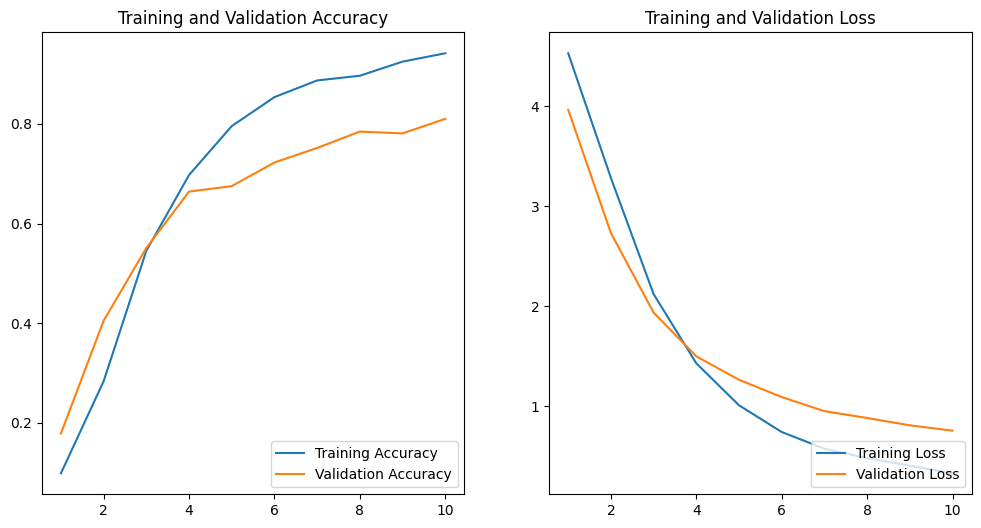

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Ensure that acc, val_acc, loss, and val_loss have the same length
assert len(acc) == len(val_acc) == len(loss) == len(val_loss)

EPOCHS = len(acc)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS + 1), acc, label="Training Accuracy")
plt.plot(range(1, EPOCHS + 1), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS + 1), loss, label="Training Loss")
plt.plot(range(1, EPOCHS + 1), val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()


In [ ]:
import json

# Assuming 'class_labels' contains the class indices
class_indices = train_generator.class_indices
class_labels = list(class_indices.keys())
with open('class_indices.json', 'w') as f:
    json.dump(class_indices, f)



In [ ]:
classification_model.save("signature personality prediction3.h5")

In [ ]:
from keras.models import load_model

# Load the saved model
model = load_model('signature personality prediction2.h5')


In [ ]:
import cv2
import numpy as np
from keras.models import load_model
import json

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not loaded properly. Please check the file path: {image_path}")
    img = cv2.resize(img, (224, 224))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    return img

def detect_features(signature_image):
    if signature_image is None:
        raise ValueError("Image not loaded properly. Please check the file path.")

    gray = cv2.cvtColor(signature_image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)

    features = {
        "curved_start": False,
        "curved_sharply_end": False,
        "curved_smoothly_end": False,
        "end_streak_increases": False,
        "end_streak_decreases": False,
        "underline": False
    }

    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        return features

    largest_contour = max(contours, key=cv2.contourArea)
    contour_length = len(largest_contour)

    start_point = largest_contour[0][0]
    end_point = largest_contour[-1][0]

    if start_point[1] < start_point[0]:
        features["curved_start"] = True

    if end_point[1] < start_point[1]:
        features["end_streak_increases"] = True
    else:
        features["end_streak_decreases"] = True


    underline_threshold = signature_image.shape[0] - 10
    for point in largest_contour:
        if point[0][1] > underline_threshold:
            features["underline"] = True
            break

    delta_x = abs(end_point[0] - start_point[0])
    delta_y = abs(end_point[1] - start_point[1])
    if delta_x > delta_y:
        features["curved_smoothly_end"] = True
    else:
        features["curved_sharply_end"] = True

    return features

def classify_personality(features):
    personality_traits = []
    if features["curved_start"] and features["curved_sharply_end"]:
        personality_traits.append("Formulates a sharp mind")
    if features["curved_start"] and features["curved_smoothly_end"]:
        personality_traits.append("Friendly and diplomatic")
    if features["end_streak_increases"]:
        personality_traits.append("Confident")
    if features["end_streak_decreases"]:
        personality_traits.append("Lacks spirit, realistic thinking, and confidence")
    if features["underline"]:
        personality_traits.append("Unique idea and thinking, needs support to make decisions, and has reliability in the lead")

    if not personality_traits:
        return "Personality traits not detected"

    return ", ".join(personality_traits)

model = load_model('signature personality prediction2.h5')

with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)
class_labels = {v: k for k, v in class_indices.items()}

test_image_path = 'archive (1)/sign_data/test/050/02_050.png'
test_image = preprocess_image(test_image_path)

if test_image is None:
    raise ValueError(f"Image not loaded properly. Please check the file path: {test_image_path}")
else:
    print(f"Image loaded successfully: {test_image_path}")

prediction = model.predict(test_image)
predicted_class_index = np.argmax(prediction)
predicted_class_label = class_labels[predicted_class_index]


if "forg" not in predicted_class_label:
    print("The signature is genuine.")
    signature_image = cv2.imread(test_image_path)

    features = detect_features(signature_image)
    print(f"Detected features: {features}")

    personality = classify_personality(features)
    print(f"The personality of the person based on the signature is: {personality}")
else:
    print("The signature is forged. Personality prediction is not performed.")
print(f"The signature is classified as: {predicted_class_label}")


Image loaded successfully: archive (1)/sign_data/test/050/02_050.png
1/1 [==============================] - 1s 845ms/step
The signature is genuine.
Detected features: {'curved_start': True, 'curved_sharply_end': True, 'curved_smoothly_end': False, 'end_streak_increases': False, 'end_streak_decreases': True, 'underline': False}
The personality of the person based on the signature is: Formulates a sharp mind, Lacks spirit, realistic thinking, and confidence
The signature is classified as: 050
